### Import packages

In [3]:
from pathlib import Path

import pandas as pd
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

### Const set

In [4]:
PATH_FIGURE_ROOT = Path("../figure")

### Data reference

In [5]:
planes = ["FY00","FY01","FY02","FY03","FY04","FY05","FY06","FY07","FY08","FY09"]

radius = 10
arches = 0

divide_arch = 2*40*np.pi/360


plane_positions = [(radius*np.cos(alpha),radius*np.sin(alpha)) for alpha in np.arange(0,2*np.pi,divide_arch)]
plane_positions.insert(0,(np.float64(0),np.float64(0)))

plane_positions_truth = [(i[0]+rand()-0.5,i[1]+rand()-0.5) for i in plane_positions[3:]]

cxs = [radius*np.cos(alpha) for alpha in np.arange(0,2*np.pi+0.1,0.1)]
cys = [radius*np.sin(alpha) for alpha in np.arange(0,2*np.pi+0.1,0.1)]


### Calculate

In [6]:
def make_line(p1,p2):
    k = np.float64(p2[1]-p1[1])/np.float64(p2[0]-p1[0])
    vk = -1/k
    b = p1[1] - p1[0]*k
    vb = (p2[1]+p1[1])/2 - vk*(p2[0]+p1[0])/2
    alpha = np.arctan(k)
    return k,b,vk,vb,alpha

In [7]:
def get_line_length(p1,p2):
    return np.sqrt((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)

In [8]:
def routate(p:np.ndarray,alpha):
    return np.dot(p,np.array([[np.cos(alpha),np.sin(alpha)],[-np.sin(alpha),np.cos(alpha)]]))

In [37]:
def get_center(p1,p2,theta):
    k,b,vk,vb,alpha = make_line(p1,p2)
    
    l = get_line_length(p1,p2)
    radius = l/(2*np.sin(theta/2))
    
    
    center_origin_p = np.array([0,radius*np.cos(theta/2)])
    center_origin_n = np.array([0,-radius*np.cos(theta/2)])
    
    p2_origin = np.array([l/2,0])
    
    p_diff = p2 - routate(p2_origin,alpha)
    

    
    center_p = routate(center_origin_p,alpha)+p_diff
    center_n = routate(center_origin_n,alpha)+p_diff
    
    return center_p,center_n,radius
    

In [27]:
get_center((3,5),(6,9),0.836448659158)

[-2.77733392e-12  1.03750000e+01]


### Draw

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\times
\begin{bmatrix}
\cos{\theta} &
\sin{\theta}
\end{bmatrix}
=
\begin{bmatrix}
x'\\
y'
\end{bmatrix}
$$

In [29]:
def plot_line(base_point,other_points):
    for p in other_points:
        plt.plot([base_point[0],p[0]],[base_point[1],p[1]])

In [30]:
def circle(center, radius,color:str):
    xs = [(radius * np.cos(theta) + center[0]) for theta in np.arange(0, 2 * np.pi, 0.01)]
    ys = [(radius * np.sin(theta) + center[1]) for theta in np.arange(0, 2 * np.pi, 0.01)]
    plt.plot(xs,ys,color=color)

### Test

In [124]:
plane_positions

[(np.float64(0.0), np.float64(0.0)),
 (np.float64(10.0), np.float64(0.0)),
 (np.float64(7.66044443118978), np.float64(6.4278760968653925)),
 (np.float64(1.7364817766693041), np.float64(9.84807753012208)),
 (np.float64(-4.999999999999998), np.float64(8.660254037844387)),
 (np.float64(-9.396926207859083), np.float64(3.420201433256689)),
 (np.float64(-9.396926207859085), np.float64(-3.4202014332566866)),
 (np.float64(-5.000000000000004), np.float64(-8.660254037844384)),
 (np.float64(1.7364817766692997), np.float64(-9.848077530122081)),
 (np.float64(7.660444431189778), np.float64(-6.427876096865396))]

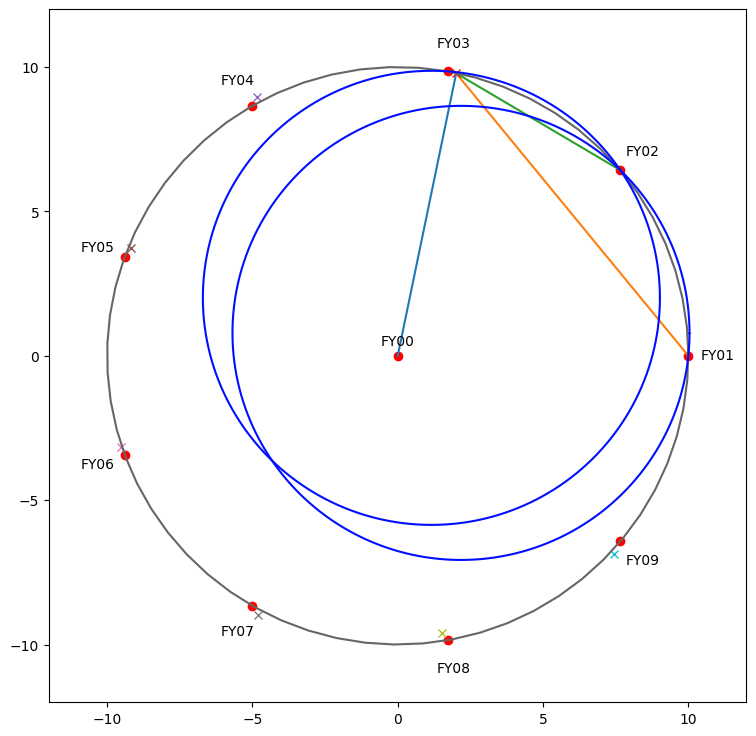

In [44]:
plt.figure(figsize=(9,9))
for i, (x, y) in enumerate(plane_positions):
    if i != 0:
        plt.plot(x, y, "ro")  # 蓝色圆点
        plt.text(
            x * 1.1, y * 1.1, planes[i], fontsize=10, ha="center", va="center"
        )  # 标签略外移
    else:
        plt.plot(x, y, "ro")  # 蓝色圆点
        plt.text(
            x, y + 0.5, planes[i], fontsize=10, ha="center", va="center"
        )  # 标签略外移
        
# for i,(x,y) in enumerate(plane_positions[1:4]):
#     plt.plot([0,x],[0,y])
plot_line(plane_positions_truth[0],plane_positions[:3])



for i, (x, y) in enumerate(plane_positions_truth):
    plt.plot(x,y,"x")
plt.xlim([-12,12])
plt.ylim([-12,12])
plt.plot(cxs, cys, color="#666666")
c1,c2,r = get_center(plane_positions[2],plane_positions[1],0.9)
c1_2,c2_2,r_2 = get_center(plane_positions[3],plane_positions[2],0.9)
# circle(c1,r,color="#FFF000")
circle(c2,r,color="#000FFF")
# circle(c1_2,r_2,color="#FFF000")
circle(c2_2,r_2,color="#000FFF")
# circle((3,3),5,"#0Ff0FF")
# plt.scatter(xs,ys,marker="x")
plt.show()